In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/risha/Downloads/IRIS (1).csv ")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


pd.set_option('display.max_columns',None)

In [3]:
print(f''' No of rows:{df.shape[0]})
no.of columns:{df.shape[1]}''')

 No of rows:150)
no.of columns:5


In [4]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

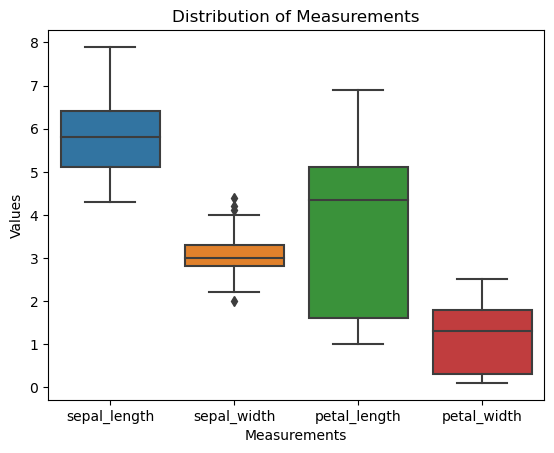

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df1 = df.drop('species', axis=1).melt(value_vars=df.drop('species', axis=1).columns)
sns.boxplot(data=df1, x='variable', y='value')  # Use data= to specify the DataFrame
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.title('Distribution of Measurements')
plt.show()


In [12]:
x=df.drop('species',axis=1)
y=df['species']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101,stratify=y)
print(f'''x train:{x_train.shape}
x test:{x_test.shape}
y train:{y_train.shape}
y test:{y_test.shape}''')


x train:(120, 4)
x test:(30, 4)
y train:(120,)
y test:(30,)


In [15]:
preprocess=Pipeline([
    ('scaler',StandardScaler())
])
model=Pipeline([
    ('preprocess',preprocess),
    ('classifier',LogisticRegression(multi_class='multinomial'))
])
model.fit(x_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

In [16]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'confusion matrix for the classification')

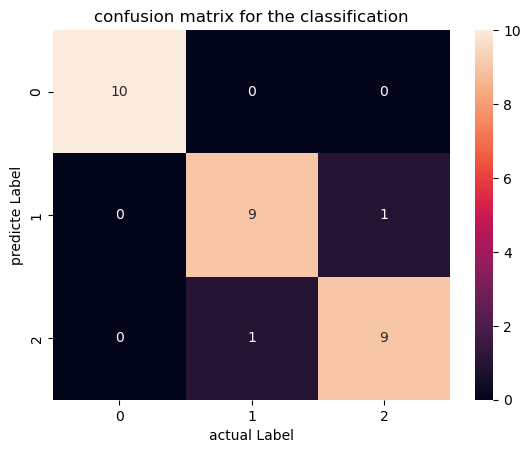

In [17]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('actual Label')
plt.ylabel('predicte Label')
plt.title('confusion matrix for the classification')

In [18]:
cr=classification_report(y_test,y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [21]:
import pickle
with open('./model.pkl','wb') as fp:
    pickle.dump(model,fp)